<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Exercise.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Exercise: Gaussian mixture models
© ExploreAI Academy

In this exercise, we'll apply Gaussian Mixture Models to the Iris dataset to understand clustering dynamics, evaluate the effectiveness of different numbers of clusters, and explore the impact of covariance types on clustering.

## Learning objectives

By the end of this exercise, you should be able to:
- Confidently implement Gaussian Mixture Models using Scikit-learn on any dataset.
- Evaluate model performance with different numbers of clusters.
- Understand the effect of different covariance types on the clustering outcome.

## Exercises

### Exercise 1: Load data
For this exercise, we'll use the Iris dataset, a famous multivariate dataset introduced by Sir Ronald Fisher in 1936, as an example of discriminant analysis. The dataset consists of 150 samples from **three species of Iris flowers** (Iris setosa, Iris virginica, and Iris versicolor) with **four features**: the length and the width of the sepals and petals.

1. Load the Iris dataset.
   
   **HINT**: Use the `load_iris()` function. 
2. Apply PCA to reduce the feature space from four dimensions to two. 
3. Plot the PCA-reduced data, colouring each point by its species label to visually assess the natural clusters within the data. 

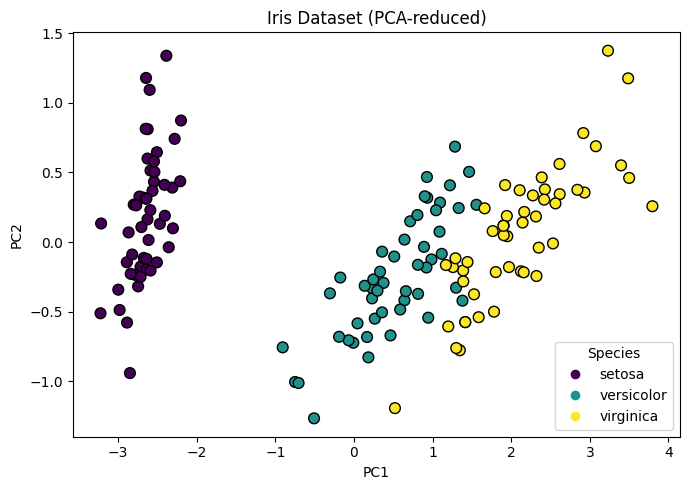

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Apply PCA to reduce to two dimensions
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# 3. Plot the PCA-reduced data, colored by species label
plt.figure(figsize=(7, 5))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis", edgecolor="k", s=60)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Iris Dataset (PCA-reduced)")
handles, _ = scatter.legend_elements()
plt.legend(handles=handles, labels=list(iris.target_names), title="Species")
plt.tight_layout()
plt.show()

### Exercise 2: Basic GMM application

Apply a Gaussian Mixture Model to the Iris dataset.
  1. Fit a GMM to the PCA-reduced data.
  2. Use three components (as suggested by the original labels).
  3. Plot the clustering results, showing the data points coloured by cluster.

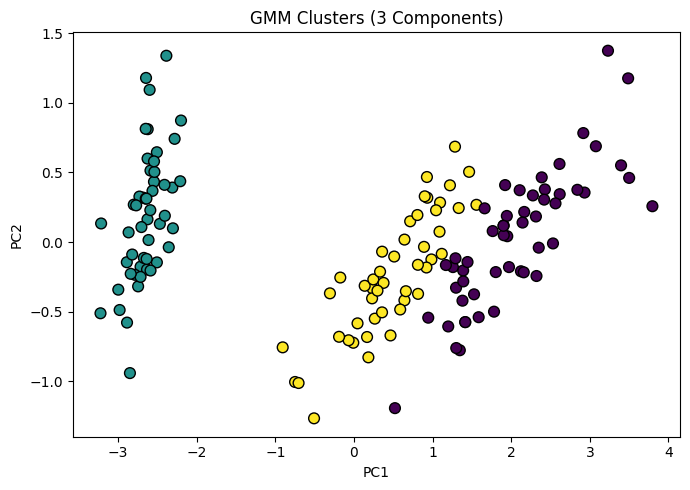

In [4]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Fit GMM with three components
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_pca)
clusters = gmm.predict(X_pca)

# Plot clustering results
plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", edgecolor="k", s=60)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("GMM Clusters (3 Components)")
plt.tight_layout()
plt.show()

### Exercise 3: Finding the optimal number of clusters

Determine the optimal number of clusters for the Iris dataset using the Bayesian Information Criterion (BIC).

  1. Fit GMMs with different numbers of components (from 1 to 6).
  2. Calculate and plot the BIC for each model.

In [ ]:
# insert code here

### Exercise 4: Effect of covariance type
Analyse the impact of different covariance types on the clustering results.
  1. Fit GMMs using the full, tied, diag, and spherical covariance types.
  2. Plot the clustering results for each type.

In [ ]:
# insert code here

## Solutions

### Exercise 1: Load data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Reduce dimensions for visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=150)
plt.title("PCA of Iris Dataset")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.colorbar()
plt.show()

This preparation and visualisation step is crucial for understanding the data’s structure before applying clustering algorithms like Gaussian Mixture Models. It helps identify if the data clusters naturally and guides the choice of parameters for more complex clustering methods.

### Exercise 2: Basic GMM application

In [ ]:
# Fit GMM
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_pca)
labels = gmm.predict(X_pca)

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=40, cmap='viridis')
plt.title("GMM Clustering of Iris Dataset")
plt.show()

The plot illustrates the clustering results, where each colour represents one of the three clusters. The clusters appear distinct, indicating that the GMM has successfully identified underlying patterns in the data corresponding roughly to the Iris species. Each cluster's spread and separation suggest a good fit, which was our objective in selecting three components, mirroring the actual number of species.

### Exercise 3: Finding the optimal number of clusters

Since we already know we have three components in the Iris dataset, validating this assumption using a statistical method like the Bayesian Information Criterion (BIC) is always good practice. This approach reinforces our understanding of the dataset's structure and ensures that our model selection is justified based on the data rather than prior knowledge alone. The BIC helps determine the number of clusters by balancing model complexity and goodness of fit, providing a quantitative measure to support or challenge our assumptions. Testing different numbers of clusters can reveal whether three is indeed the optimal choice or if a more straightforward or more complex model could better capture the inherent patterns in the data.

In [ ]:
# BIC for different number of components
bic = []
n_components_range = range(1, 7)
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(X_pca)
    bic.append(gmm.bic(X_pca))

# Plot BIC scores
plt.figure(figsize=(8, 6))
plt.plot(n_components_range, bic, marker='o')
plt.title("BIC Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("BIC Score")
plt.show()

The plot shows the Bayesian Information Criterion (BIC) scores for models with varying numbers of clusters, ranging from 1 to 6. 

The BIC scores decrease sharply as we move from one to two clusters, suggesting a significant improvement in model fit. The BIC score reaches its lowest point at two clusters, indicating that a model with two clusters best balances model complexity with fit to the data. As the number of clusters increases from two to six, the BIC scores level off and gradually increase, suggesting that adding more clusters beyond two does not provide a better-fit relative to the increase in complexity. Therefore, according to this BIC analysis, the optimal number of clusters is two.

This observation, despite the known classification of the Iris dataset into three species, indicates potential model misfit or data overlap. This discrepancy can occur due to several reasons: 
- the inherent overlap between the species in the dataset.
- PCA-induced data simplification that might have obscured some nuances between classes. 
- BIC's penalty for model complexity favours simpler models when the distinction between some classes is not stark. 
 
This scenario underscores the importance of combining statistical model selection criteria with domain knowledge and potentially other model validation techniques to ensure a comprehensive understanding and accurate classification in practical applications.

### Exercise 4: Effect of covariance type

The provided solution explores how different covariance types affect the clustering behaviour of Gaussian Mixture Models (GMM) applied to the PCA-reduced Iris dataset. The code fits GMMs using four covariance types—'full', 'tied', 'diag', and 'spherical'— each defining how the variance and covariance are structured across clusters:

- **Full**: Each cluster has its own general covariance matrix, allowing for ellipsoidal shapes in any orientation.
- **Tied**: All clusters share the same general covariance matrix, which can express complex shapes but is the same across clusters.
- **Diag**: Each cluster has its own diagonal covariance matrix, restricting the cluster's shape to an axis-aligned ellipsoid.
- **Spherical**: Each cluster must be spherical, with all dimensions having equal variance, simplifying the geometry of the clusters.

In [ ]:
# Fit GMMs with different covariance types
covariance_types = ['full', 'tied', 'diag', 'spherical']
for cov_type in covariance_types:
    gmm = GaussianMixture(n_components=3, covariance_type=cov_type, random_state=42)
    gmm.fit(X_pca)
    labels = gmm.predict(X_pca)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolor='k', s=150)
    plt.title(f"GMM with {cov_type} covariance")
    plt.show()


The resulting plots visually depict how these assumptions influence the clustering results. The 'full' covariance allows for the most flexible cluster shapes, adapting to the data's natural distribution. 'Tied' covariance maintains complexity but forces the same shape across all clusters. 'Diag' and 'spherical' increasingly restrict the cluster shapes, which can lead to a less accurate representation of data relationships if the actual structure is complex. Each plot shows clusters marked by different colours, illustrating the spatial distribution and separation achieved under each covariance assumption.

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>